In [13]:
import pandas as pd
import seaborn as sns
#df1 = pd.read_csv('sample_submission.csv')
#df2 = pd.read_csv('test.csv')
df = pd.read_csv('Seasons_Stats.csv')


In [34]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

In [16]:
df.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...      FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...    0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...    0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...    0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...    0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...    0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

In [17]:
#Year - год игры
#Age - возраст игроков
#MP - кол-во сыгранных минут
#MP - кол-во сыгранных минут
#PER - рейтинг эффективности игрока
#GS - количество начатых игр
#G - игры
#AST - количество очков
#PF - количество очков
#OWS - выигрыш в нападении
#DWS - выигрыш в обороне


useful_cols = ['Year','Age','MP','PER','GS','PTS']
a=df[useful_cols]
b=a[a.MP>0][a.GS>0]
corr=b.corr()

In [18]:
corr.head()

Year       Age        MP       PER        GS       PTS
Year  1.000000  0.001377 -0.108039 -0.012530 -0.069144 -0.122615
Age   0.001377  1.000000 -0.023423 -0.041558  0.011743 -0.056209
MP   -0.108039 -0.023423  1.000000  0.588096  0.856968  0.906019
PER  -0.012530 -0.041558  0.588096  1.000000  0.523323  0.730986
GS   -0.069144  0.011743  0.856968  0.523323  1.000000  0.780825

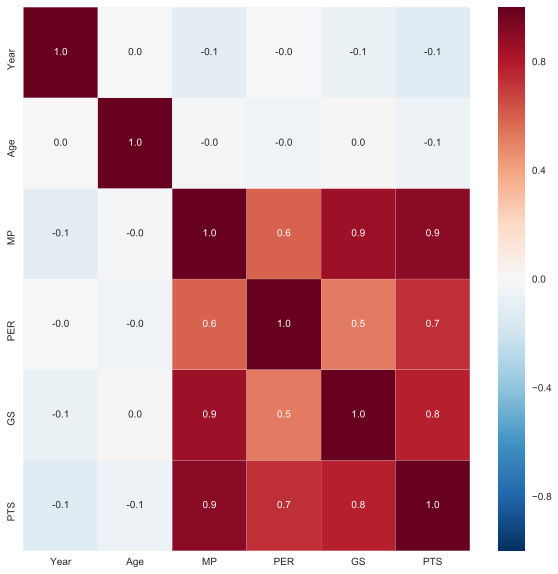

In [19]:
#Корелляция между выбранными переменными
%matplotlib inline
pyplot.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True,xticklabels=corr.columns.values,fmt=".1f",yticklabels=corr.columns.values,linewidths=0.1)

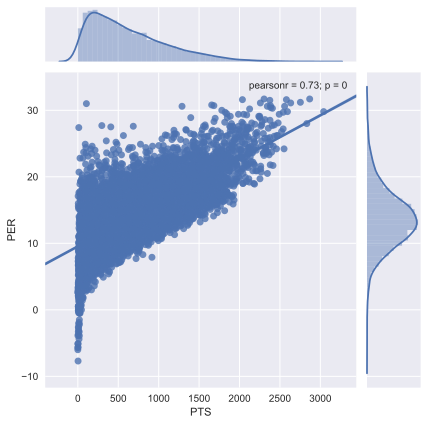

In [20]:
#Корелляция между эффективностью и кол-вом баллов
sns.jointplot(x='PTS', y='PER', 
              data=b, kind='reg');

In [23]:
sns.jointplot(x='OWS', y='DWS', 
              data=df, kind='reg');

In [24]:
df1 = df[['3P','2P'] + ['Year']]\
    .groupby('Year').sum()
df1.head()

3P       2P
Year               
1950.0 NaN  36436.0
1951.0 NaN  23215.0
1952.0 NaN  20526.0
1953.0 NaN  22182.0
1954.0 NaN  19490.0

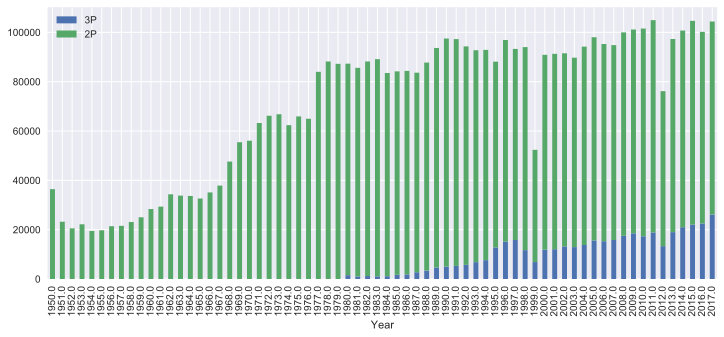

In [35]:
#Суммарное кол-во голов по типам
df1[list(df1.columns)]\
    .plot(kind='bar', rot=90, stacked=True);

In [26]:
#Распределение команд по набранным очкам 
top_player_df = df.groupby('Tm')[['PTS']].sum()\
    .sort_values('PTS', ascending=False).head(10)
    
top_player_df.style.bar(color='yellow')

In [27]:
df5=pd.DataFrame()
df6=pd.DataFrame()
df7=pd.DataFrame()
dss1=df[df.Tm=='TOT'][['Year','PTS']]
dss2=df[(df.Tm=='BOS')][['Year','PTS']]
dss3=df[(df.Tm=='NYK')][['Year','PTS']]
df5=df5.append(dss1)
df5.columns=['Year','TOT']
df6=df6.append(dss2)
df6.columns=['Year','BOS']
df7=df7.append(dss3)
df7.columns=['Year','NYK']

In [28]:
join1=df5.merge(df6,on='Year')
join2=join1.merge(df7,on='Year')

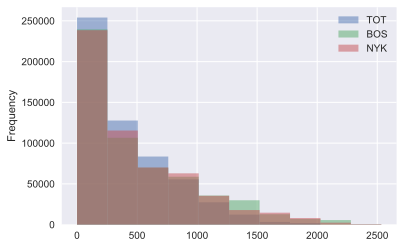

In [29]:
#Сопоставление команд по очкам
join2[list(filter(lambda x: x != 'Year', join2.columns))].plot.hist(alpha=0.5)

In [36]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [42]:
##Взаимосвязь между эффективностью и возрастом
data = []

for genre in df.Age.unique():
    data.append(
        go.Box(y=df[df.Age==genre].PER, 
               name=genre)
    )
iplot(data, show_link = False)